In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('cleaned_dataset_bcrp.csv')

C:\Users\Abin\AppData\Local\Temp\ipykernel_5728\811076703.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('cleaned_dataset_bcrp.csv')


In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,3.146.400.146,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02/03/2018 22:56,Standard Class
1,TRANSFER,5,4,-2.490.899.963,3.113.599.854,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-2.477.799.988,3.097.200.012,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,2.286.000.061,3.048.099.976,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,1.342.100.067,298.25,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
# First, create a disruption flag

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define disruption
df['Disrupted'] = df['Order Status'].isin(['CANCELED', 'SUSPECTED_FRAUD', 'ON_HOLD']).astype(int)


In [8]:
# Which Regions are most affected by order cancellations or failures?

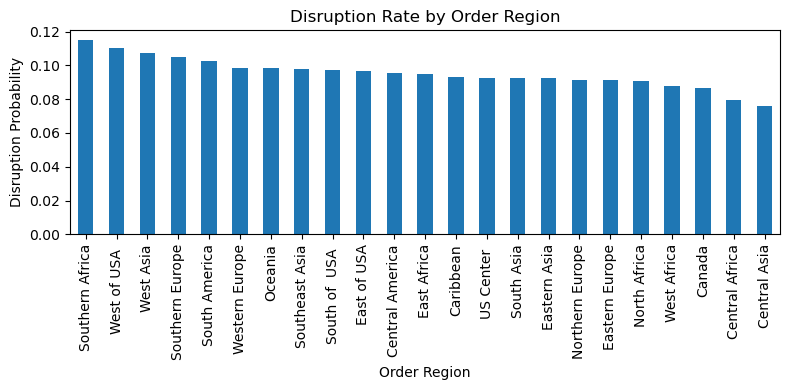

In [7]:
region_disruption = df.groupby('Order Region')['Disrupted'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
region_disruption.plot(kind='bar')
plt.title("Disruption Rate by Order Region")
plt.ylabel("Disruption Probability")
plt.tight_layout()
plt.show()


In [9]:
# Do certain Shipping Modes correlate with higher disruption rates?

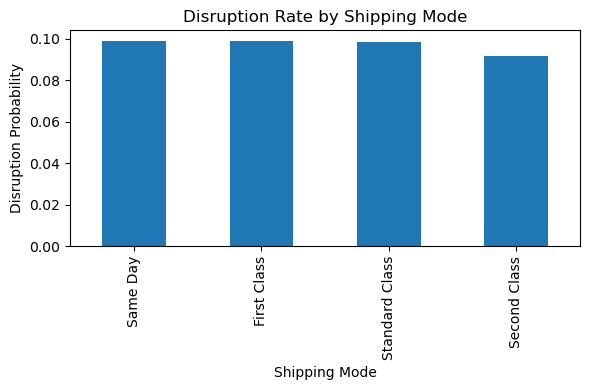

In [10]:
ship_disruption = df.groupby('Shipping Mode')['Disrupted'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
ship_disruption.plot(kind='bar')
plt.title("Disruption Rate by Shipping Mode")
plt.ylabel("Disruption Probability")
plt.tight_layout()
plt.show()


In [11]:
# Are international orders more prone to disruptions?

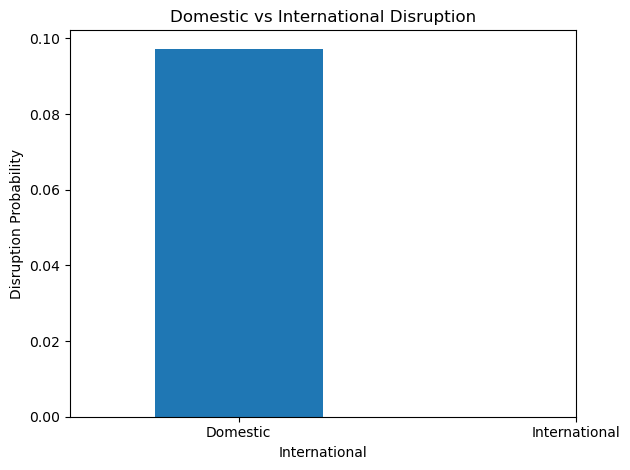

In [12]:
df['International'] = (df['Order Country'] != df['Customer Country']).astype(int)

intl_disruption = df.groupby('International')['Disrupted'].mean()

plt.figure()
intl_disruption.plot(kind='bar')
plt.xticks([0,1], ['Domestic','International'], rotation=0)
plt.title("Domestic vs International Disruption")
plt.ylabel("Disruption Probability")
plt.tight_layout()
plt.show()


In [13]:
# Which Markets experience the most unstable delivery performance?

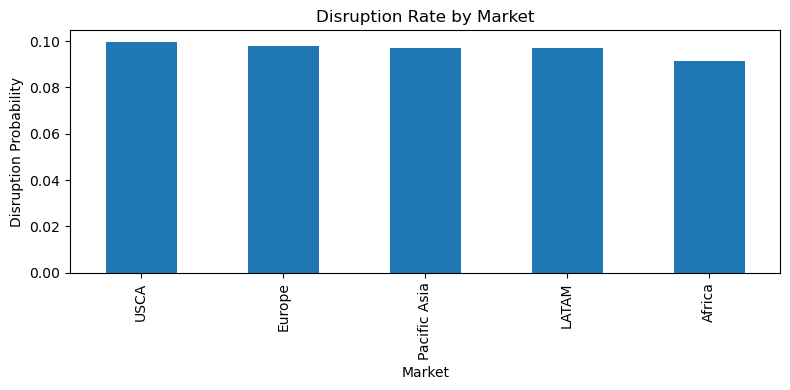

In [14]:
market_disruption = df.groupby('Market')['Disrupted'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
market_disruption.plot(kind='bar')
plt.title("Disruption Rate by Market")
plt.ylabel("Disruption Probability")
plt.tight_layout()
plt.show()


In [15]:
# Are specific Order Status values indicators of disruption?

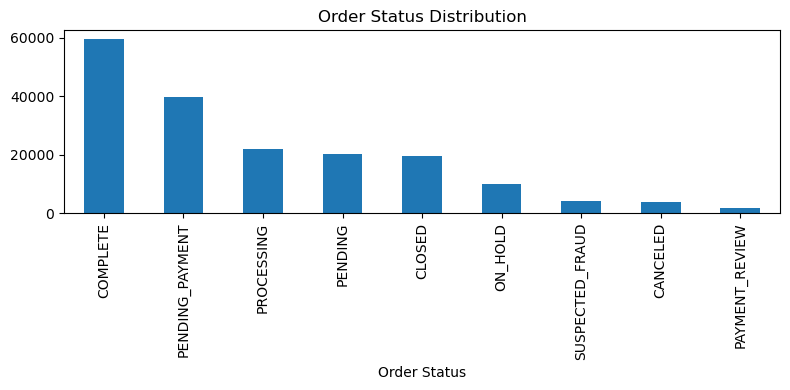

In [16]:
status_counts = df['Order Status'].value_counts()

plt.figure(figsize=(8,4))
status_counts.plot(kind='bar')
plt.title("Order Status Distribution")
plt.tight_layout()
plt.show()


In [17]:
# Do extreme delays lead to failure?

C:\Users\Abin\AppData\Local\Temp\ipykernel_5728\3858704758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_vs_disruption = df.groupby(delay_bins)['Disrupted'].mean()


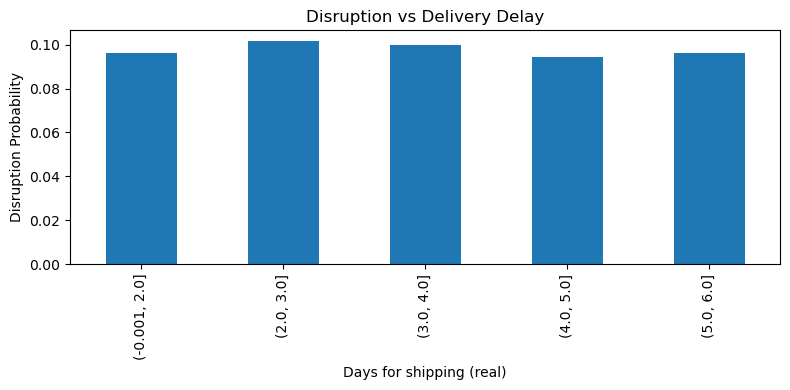

In [18]:
delay_bins = pd.qcut(df['Days for shipping (real)'], 5, duplicates='drop')
delay_vs_disruption = df.groupby(delay_bins)['Disrupted'].mean()

plt.figure(figsize=(8,4))
delay_vs_disruption.plot(kind='bar')
plt.title("Disruption vs Delivery Delay")
plt.ylabel("Disruption Probability")
plt.tight_layout()
plt.show()


In [19]:
# Are disruption patterns linked to geography?

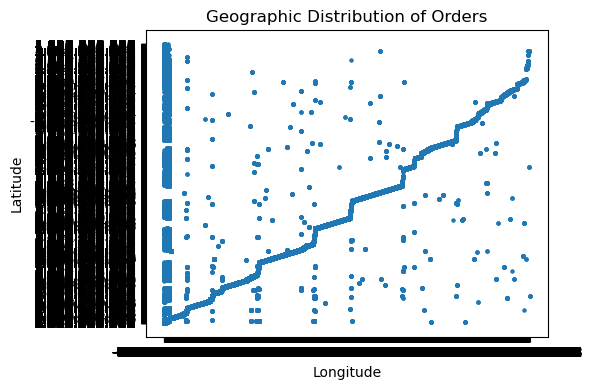

In [21]:
geo = df[['Latitude','Longitude','Disrupted']].dropna()

plt.figure(figsize=(6,4))
plt.scatter(geo['Longitude'], geo['Latitude'], s=5)
plt.title("Geographic Distribution of Orders")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [22]:
# Are certain Customer Segments more impacted?

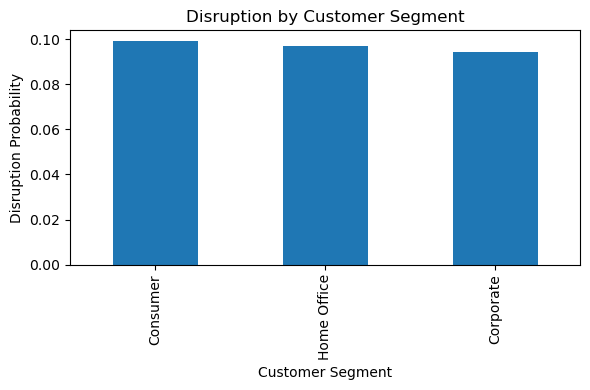

In [23]:
segment_disruption = df.groupby('Customer Segment')['Disrupted'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
segment_disruption.plot(kind='bar')
plt.title("Disruption by Customer Segment")
plt.ylabel("Disruption Probability")
plt.tight_layout()
plt.show()


In [24]:
# Do specific Products repeatedly appear in disrupted orders?

C:\Users\Abin\AppData\Local\Temp\ipykernel_5728\706350832.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


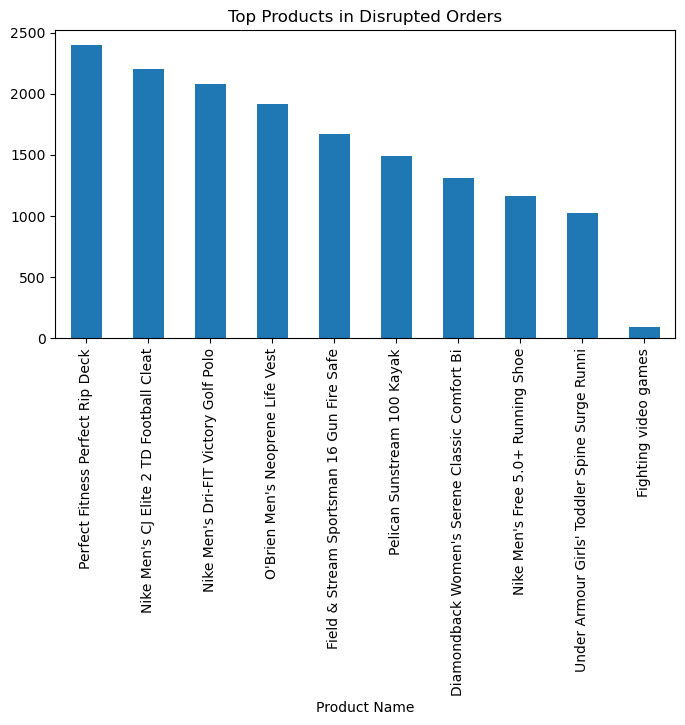

In [25]:
product_disrupt = (
    df[df['Disrupted'] == 1]['Product Name']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,4))
product_disrupt.plot(kind='bar')
plt.title("Top Products in Disrupted Orders")
plt.tight_layout()
plt.show()


In [26]:
# Can disruption events be predicted before shipping?Can disruption events be predicted before shipping?

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

features = [
    'Order Item Quantity',
    'Product Price',
    'Sales per customer',
    'Late_delivery_risk',
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    
]

X = df[features]
y = df['Disrupted']

# Convert to numeric
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors='coerce')

# Impute missing values
imp = SimpleImputer(strategy='median')
X = imp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
print("Disruption Prediction ROC-AUC:", roc_auc_score(y_test, y_prob))


C:\Users\Abin\AppData\Local\Temp\ipykernel_5728\3683379468.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = pd.to_numeric(X[c], errors='coerce')


Disruption Prediction ROC-AUC: 0.6767612906950349


In [33]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na